# Paper 2 Machine Learning

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

# make consistent column name keys across files
country_title = ['Country', 'Country or region', "Country name"]
economy_title = ["Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita", "Explained by: Log GDP per capita"]
trust_title = ["Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption"]
health_title = ["Trust (Government Corruption)", "Trust..Government.Corruption.", "Healthy life expectancy"]
generosity_title = ["Generosity"]
family_title = ["Family", "Social support"]
score_title = ["Happiness Score", "Happiness.Score", "Score", "Ladder score"]

# process each year and append it to a list
data_all_years_list = []
for year in range(2015, 2022):
    file = pd.read_csv(f'data/{year}.csv')
    df = file.loc[:, file.columns.isin(list(country_title))].copy()
    df = df.rename(columns={'Country or region': 'Country', "Country name": 'Country'})
    df["Economy"] = file.loc[:, file.columns.isin(list(economy_title))].copy()
    df["Trust"] = file.loc[:, file.columns.isin(list(trust_title))].copy()
    df["Health"] = file.loc[:, file.columns.isin(list(health_title))].copy()
    df["Generosity"] = file.loc[:, file.columns.isin(list(generosity_title))].copy()
    df["Family"] = file.loc[:, file.columns.isin(list(family_title))].copy()
    df["Score"] = file.loc[:, file.columns.isin(list(score_title))].copy()
    df['Year'] = year
    data_all_years_list.append(df)
    # display(file)

# concatenate each year and create single dataframe
df = pd.concat(data_all_years_list, ignore_index=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# One hot encoding and min max scaling
country_one_hot= pd.get_dummies(df.Country)
df = df.join(country_one_hot)
df = df.dropna().drop(["Country"], axis=1)

# scaler = MinMaxScaler()
# columns = df.columns.drop(['Year'])
# df[columns] = scaler.fit_transform(df[columns])
df

,Economy,Trust,Health,Generosity,Family,Score,Year,Afghanistan,Albania,Algeria,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1.39651,0.41978,0.41978,0.29678,1.34951,7.587,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.30232,0.14145,0.14145,0.43630,1.40223,7.561,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.32548,0.48357,0.48357,0.34139,1.36058,7.527,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.45900,0.36503,0.36503,0.34699,1.33095,7.522,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.32629,0.32957,0.32957,0.45811,1.32261,7.427,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0.45100,0.91500,48.70000,-0.13100,0.78700,3.512,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1080,1.09900,0.80100,59.26900,-0.24600,0.78400,3.467,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,0.36400,0.16700,61.40000,0.06100,0.55200,3.415,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,0.45700,0.82100,56.20100,-0.04700,0.75000,3.145,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# separate features and target

features = df.drop(["Score", "Year"], axis=1)
target = df["Score"]
display(df)

,Economy,Trust,Health,Generosity,Family,Score,Year,Afghanistan,Albania,Algeria,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1.39651,0.41978,0.41978,0.29678,1.34951,7.587,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.30232,0.14145,0.14145,0.43630,1.40223,7.561,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.32548,0.48357,0.48357,0.34139,1.36058,7.527,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.45900,0.36503,0.36503,0.34699,1.33095,7.522,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.32629,0.32957,0.32957,0.45811,1.32261,7.427,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0.45100,0.91500,48.70000,-0.13100,0.78700,3.512,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1080,1.09900,0.80100,59.26900,-0.24600,0.78400,3.467,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,0.36400,0.16700,61.40000,0.06100,0.55200,3.415,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,0.45700,0.82100,56.20100,-0.04700,0.75000,3.145,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# create SVR model and fit
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# split train and test data by years
X_train = features[df['Year'] < 2021]
X_test = features[df['Year'] == 2021]
y_train = target[df['Year'] < 2021]
y_test = target[df['Year'] == 2021]

# fit model
svr = SVR(kernel="linear").fit(X_train, y_train)

# generate R squared scores
y_pred = svr.predict(X_test)
r_squared_score = r2_score(y_pred, y_test)
print(r_squared_score)

0.8757687552883753


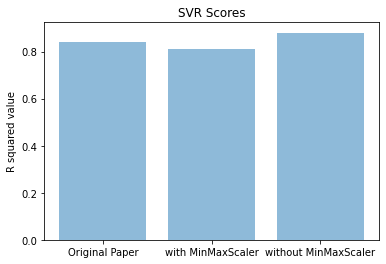

In [23]:
import numpy as np
import matplotlib.pyplot as plt

objects = ('Original Paper', 'with MinMaxScaler', 'without MinMaxScaler')
y_pos = np.arange(len(objects))
performance = [0.84, 0.81, 0.88]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R squared value')
plt.title('SVR Scores')

plt.show()
